# IST 736 Final Project - "Last Statement"

# Step 1: Read in data

In [1]:
# read in the training data

# the data set includes four columns: PhraseId, SentenceId, Phrase, Sentiment
# In this data set a sentence is further split into phrases 
# in order to build a sentiment classification model
# that can not only predict sentiment of sentences but also shorter phrases

# A data example:
# PhraseId SentenceId Phrase Sentiment
# 1 1 A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .1

# the Phrase column includes the training examples
# the Sentiment column includes the training labels
# "Remorseful" for remorse of wrong doing
# "Resentment" for resentment of justice system
# "Other" for other sentiment of last statement

import numpy as np
import pandas as p

# train=p.read_csv("/Users/byu/Desktop/data/kaggle/train.tsv", delimiter='\t')
# train=p.read_csv("C:/Users/IST 736 Text Mining/offenders_Label_ROR_sample.csv", encoding= 'unicode_escape')
train=p.read_csv("C:/Users/IST 736 Text Mining/offenders_Label_ROR.csv", encoding= 'unicode_escape')
y=train['Label'].values
X=train['Last Statement'].values

In [2]:
print(X)
print(y)

["Yes, I do, Grace Kehler is that you? I have given Warden  Jones a written statement that will explain a lot more. I hope this will bring  you closure and answers to some questions. I hope this will bring you peace and  I'm sorry for all the pain and suffering. I'm sorry it went on for a terribly  long time. I'm sorry to you especially Grace Kehler. To the Kehler, Johnson and  Crain family, I pray that you won't hate Jesus, the letter will explain more.  I'm sorry. I'm sorry. I hope that my death will bring you peace and closure. I  pray that maybe someday will bring you peace. I hope that you could forgive me,  but if you don't I understand. I don't think I could forgive anyone who would  of killed my children. I'm sorry for your suffering you've had for a long time.  I'm sorry, I'm sorry. I love you Lord Jesus, Lord Jesus."
 'Yes sir, I would first like to say to the Sanchez family  how sorry I am. Words cannot begin to express how sorry I am and  the hurt that I have caused you and

# Step 2: Split train/test data for hold-out test

In [3]:
# check the sklearn documentation for train_test_split
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# "test_size" : float, int, None, optional
# If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split. 
# If int, represents the absolute number of test samples. 
# If None, the value is set to the complement of the train size. 
# By default, the value is set to 0.25. The default will change in version 0.21. It will remain 0.25 only if train_size is unspecified, otherwise it will complement the specified train_size.    

from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print(X_train[0])
print(y_train[0])
print(X_test[0])
print(y_test[0])

(340,) (340,) (85,) (85,)
 I'd like to apologize to the victim's family. Ah, no ah, I really can't say, I don't think I can say anything that will help, but I hope through your God, you can forgive me. I'm definitely not the person now that I was then. I was sick, afraid, and looking for love in all the wrong ways. I've caused you pain and grief beyond ever dreaming to cause someone of. I hope you will be able to forgive me. To my mother, I love you very much. Thanks, Jones.  
Remorseful
Yes.  The victim's family is not here so I won't address them.  I want to thank my family and friends for everything.  My wife, Ailsa, my sister-in-law, Laura - thank you for being here for me.  I love you.  And thanks for the friends at the Polunsky Unit that helped me get through this that didn't agree with my decision - and still gave me their friendship.  I thank them.  Warden...  
Other


# Step 2.1 Data Checking

In [4]:
# Check how many training examples in each category
# this is important to see whether the data set is balanced or skewed

unique, counts = np.unique(y_train, return_counts=True)
print(np.asarray((unique, counts)))

[['Other' 'Remorseful' 'Resentment']
 [144 154 42]]


# Step 3: Vectorization

In [5]:
# sklearn contains two vectorizers

# CountVectorizer can give you Boolean or TF vectors

# TfidfVectorizer can give you TF or TFIDF vectors
# http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

# Read the sklearn documentation to understand all vectorization options

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# several commonly used vectorizer setting

#  unigram boolean vectorizer, set minimum document frequency to 3
unigram_bool_vectorizer = CountVectorizer(encoding='latin-1', binary=True, min_df=3, stop_words='english')

#  unigram term frequency vectorizer, set minimum document frequency to 3
unigram_count_vectorizer = CountVectorizer(encoding='latin-1', binary=False, min_df=3, stop_words='english')

#  unigram and bigram term frequency vectorizer, set minimum document frequency to 3
gram12_count_vectorizer = CountVectorizer(encoding='latin-1', ngram_range=(1,2), min_df=3, stop_words='english')

#  unigram tfidf vectorizer, set minimum document frequency to 5
unigram_tfidf_vectorizer = TfidfVectorizer(encoding='latin-1', use_idf=True, min_df=3, stop_words='english')


## Step 3.1: Vectorize the training data

In [6]:
# The vectorizer can do "fit" and "transform"
# fit is a process to collect unique tokens into the vocabulary
# transform is a process to convert each document to vector based on the vocabulary
# These two processes can be done together using fit_transform(), or used individually: fit() or transform()

# fit vocabulary in training documents and transform the training documents into vectors
X_train_vec = unigram_count_vectorizer.fit_transform(X_train)

# check the content of a document vector
print(X_train_vec.shape)
print(X_train_vec[0].toarray())

# check the size of the constructed vocabulary
print(len(unigram_count_vectorizer.vocabulary_))

# print out the first 10 items in the vocabulary
print(list(unigram_count_vectorizer.vocabulary_.items())[:10])

# check word index in vocabulary
print(unigram_count_vectorizer.vocabulary_.get('hope'))

(340, 629)
[[0 0 1 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 2 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0
  0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0

## Step 3.2: Vectorize the test data

In [7]:
# use the vocabulary constructed from the training data to vectorize the test data. 
# Therefore, use "transform" only, not "fit_transform", 
# otherwise "fit" would generate a new vocabulary from the test data

X_test_vec = unigram_count_vectorizer.transform(X_test)

# print out #examples and #features in the test set
print(X_test_vec.shape)

(85, 629)


# Step 4: Train a MNB classifier

In [8]:
# import the MNB module
from sklearn.naive_bayes import MultinomialNB

# initialize the MNB model
nb_clf= MultinomialNB()

# use the training data to train the MNB model
nb_clf.fit(X_train_vec,y_train)

MultinomialNB()

# Step 4.1 Interpret a trained MNB model

In [9]:
## interpreting naive Bayes models
## by consulting the sklearn documentation you can also find out feature_log_prob_, 
## which are the conditional probabilities

# the code below will print out the conditional prob of the word "worthless" in each category
# sample output
# -8.98942647599 -> logP('worthless'|very negative')
# -11.1864401922 -> logP('worthless'|negative')
# -12.3637684625 -> logP('worthless'|neutral')
# -11.9886066961 -> logP('worthless'|positive')
# -11.0504454621 -> logP('worthless'|very positive')
# the above output means the word feature "worthless" is indicating "very negative" 
# because P('worthless'|very negative) is the greatest among all conditional probs

unigram_count_vectorizer.vocabulary_.get('like')
for i in range(0,5):
  print(nb_clf.feature_log_prob_[i][unigram_count_vectorizer.vocabulary_.get('like')])

-4.686494123817677
-4.110010678966501
-4.968995972190902


IndexError: index 3 is out of bounds for axis 0 with size 3

In [ ]:
# sort the conditional probability for category remorseful "very negative"
# print the words with highest conditional probs
# these can be words popular in the "remorseful" category alone, or words popular in all cateogires

feature_ranks = sorted(zip(nb_clf.feature_log_prob_[0], unigram_count_vectorizer.get_feature_names()))
very_negative_features = feature_ranks[-10:]
print(very_negative_features)

Sample output for print(log_ratios[0])

-0.838009538739

# Step 5: Test the MNB classifier

In [10]:
# test the classifier on the test data set, print accuracy score

nb_clf.score(X_test_vec,y_test)

0.611764705882353

In [11]:
# print confusion matrix (row: ground truth; col: prediction)

from sklearn.metrics import confusion_matrix
y_pred = nb_clf.fit(X_train_vec, y_train).predict(X_test_vec)
cm=confusion_matrix(y_test, y_pred, labels=["Remorseful", "Resentment", "Other"])
print(cm)

[[34  1  1]
 [ 6  1  0]
 [23  2 17]]


In [12]:
# print classification report

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print(precision_score(y_test, y_pred, average=None))
print(recall_score(y_test, y_pred, average=None))

from sklearn.metrics import classification_report
target_names = ["Remorseful", "Resentment", "Other"]
print(classification_report(y_test, y_pred, target_names=target_names))

[0.94444444 0.53968254 0.25      ]
[0.4047619  0.94444444 0.14285714]
              precision    recall  f1-score   support

  Remorseful       0.94      0.40      0.57        42
  Resentment       0.54      0.94      0.69        36
       Other       0.25      0.14      0.18         7

    accuracy                           0.61        85
   macro avg       0.58      0.50      0.48        85
weighted avg       0.72      0.61      0.59        85



# Step 5.1 Interpret the prediction result

In [13]:
## find the calculated posterior probability
posterior_probs = nb_clf.predict_proba(X_test_vec)

## find the posterior probabilities for the first test example
print(posterior_probs[0])

# find the category prediction for the first test example
y_pred = nb_clf.predict(X_test_vec)
print(y_pred[0])

# check the actual label for the first test example
print(y_test[0])

[1.62073101e-04 9.99211325e-01 6.26602046e-04]
Remorseful
Other


# Step 5.2 Error Analysis

In [14]:
# print out specific type of error for further analysis

# print out the very positive examples that are mistakenly predicted as negative
# according to the confusion matrix, there should be 53 such examples
# note if you use a different vectorizer option, your result might be different

err_cnt = 0
for i in range(0, len(y_test)):
    if(y_test[i]==4 and y_pred[i]==1):
        print(X_test[i])
        err_cnt = err_cnt+1
print("errors:", err_cnt)

errors: 0


# Step 6: write the prediction output to file

In [15]:
y_pred=nb_clf.predict(X_test_vec)

output = open('C:/Users/veo78/IST 736 Text Mining/prediction_output.csv', 'w')
for x, value in enumerate(y_pred):
  output.write(str(value) + '\n')
for x, value in enumerate(y_test, start=2):
  output.write(str(value) + '\n') 
output.close()

In [16]:
# for x, value in enumerate(y_pred):
#     print(x)

print(y_pred)
print(y_test)

['Remorseful' 'Resentment' 'Remorseful' 'Other' 'Remorseful' 'Remorseful'
 'Other' 'Remorseful' 'Remorseful' 'Remorseful' 'Remorseful' 'Remorseful'
 'Remorseful' 'Remorseful' 'Remorseful' 'Remorseful' 'Remorseful'
 'Remorseful' 'Remorseful' 'Remorseful' 'Remorseful' 'Remorseful'
 'Remorseful' 'Other' 'Resentment' 'Other' 'Remorseful' 'Remorseful'
 'Resentment' 'Other' 'Other' 'Remorseful' 'Other' 'Remorseful' 'Other'
 'Remorseful' 'Remorseful' 'Other' 'Other' 'Remorseful' 'Remorseful'
 'Remorseful' 'Remorseful' 'Other' 'Remorseful' 'Remorseful' 'Remorseful'
 'Remorseful' 'Remorseful' 'Other' 'Other' 'Remorseful' 'Other'
 'Remorseful' 'Resentment' 'Remorseful' 'Remorseful' 'Other' 'Remorseful'
 'Remorseful' 'Remorseful' 'Other' 'Remorseful' 'Remorseful' 'Remorseful'
 'Remorseful' 'Remorseful' 'Remorseful' 'Remorseful' 'Remorseful'
 'Remorseful' 'Remorseful' 'Remorseful' 'Remorseful' 'Remorseful' 'Other'
 'Remorseful' 'Remorseful' 'Other' 'Remorseful' 'Remorseful' 'Remorseful'
 'Remorsef

# BernoulliNB

In [18]:
from sklearn.naive_bayes import BernoulliNB

X_train_vec_bool = unigram_bool_vectorizer.fit_transform(X_train)

# initialize the MNB model
# bernoulliNB_clf = BernoulliNB.fit(X_train_vec_bool, y_train)
bernoulliNB_clf = BernoulliNB()
    
# use the training data to train the MNB model
bernoulliNB_clf.fit(X_train_vec_bool,y_train)    


BernoulliNB()

In [19]:
# use the vocabulary constructed from the training data to vectorize the test data. 
# Therefore, use "transform" only, not "fit_transform", 
# otherwise "fit" would generate a new vocabulary from the test data

X_test_vec_bool = unigram_bool_vectorizer.transform(X_test)

# print out #examples and #features in the test set
print(X_test_vec_bool.shape)

(85, 629)


In [20]:
# test the classifier on the test data set, print accuracy score

bernoulliNB_clf.score(X_test_vec_bool,y_test)

0.7176470588235294

In [21]:
# print confusion matrix (row: ground truth; col: prediction)

# from sklearn.metrics import confusion_matrix

y_pred_B = bernoulliNB_clf.fit(X_train_vec_bool, y_train).predict(X_test_vec_bool)
cm=confusion_matrix(y_test, y_pred, labels=["Remorseful", "Resentment", "Other"])
print(cm)

[[34  1  1]
 [ 6  1  0]
 [23  2 17]]


In [22]:
# print classification report

# from sklearn.metrics import precision_score
# from sklearn.metrics import recall_score

print(precision_score(y_test, y_pred_B, average=None))
print(recall_score(y_test, y_pred_B, average=None))

from sklearn.metrics import classification_report

target_names = ["Remorseful", "Resentment", "Other"]
print(classification_report(y_test, y_pred_B, target_names=target_names))

[0.76190476 0.70731707 0.        ]
[0.76190476 0.80555556 0.        ]
              precision    recall  f1-score   support

  Remorseful       0.76      0.76      0.76        42
  Resentment       0.71      0.81      0.75        36
       Other       0.00      0.00      0.00         7

    accuracy                           0.72        85
   macro avg       0.49      0.52      0.51        85
weighted avg       0.68      0.72      0.70        85



# Cross Validation

In [23]:
# cross validation

from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
nb_clf_pipe = Pipeline([('vect', CountVectorizer(encoding='latin-1', binary=False)),('nb', MultinomialNB())])
scores = cross_val_score(nb_clf_pipe, X, y, cv=3)
avg=sum(scores)/len(scores)
print(avg)

0.5813272067392535


# Optional: use external linguistic resources such as stemmer

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk.stem

english_stemmer = nltk.stem.SnowballStemmer('english')
class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: ([english_stemmer.stem(w) for w in analyzer(doc)])

stem_vectorizer = StemmedCountVectorizer(min_df=3, analyzer="word")
X_train_stem_vec = stem_vectorizer.fit_transform(X_train)

In [25]:
# check the content of a document vector
print(X_train_stem_vec.shape)
print(X_train_stem_vec[0].toarray())

# check the size of the constructed vocabulary
print(len(stem_vectorizer.vocabulary_))

# print out the first 10 items in the vocabulary
print(list(stem_vectorizer.vocabulary_.items())[:10])

# check word index in vocabulary
print(stem_vectorizer.vocabulary_.get('adopt'))

(340, 750)
[[0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0
  0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 3 0 0 0 0 0
  2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  1 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
  0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
  0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
  1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
  0 0 0 0 0 0 0 0 0 0 0 0 0

# Word Cloud

In [26]:
# print(unigram_count_vectorizer) 
# print(unigram_tfidf_vectorizer)


X_train_vec_WordCloud = unigram_count_vectorizer.fit_transform(X_train)
X_train_tfidf_vec_WordCloud = unigram_tfidf_vectorizer.fit_transform(X_train)

print(X_train_vec_WordCloud)
print(X_train_tfidf_vec_WordCloud)

  (0, 309)	1
  (0, 26)	1
  (0, 583)	1
  (0, 162)	1
  (0, 8)	2
  (0, 428)	1
  (0, 462)	2
  (0, 140)	1
  (0, 544)	1
  (0, 238)	1
  (0, 249)	2
  (0, 198)	1
  (0, 177)	2
  (0, 389)	1
  (0, 321)	1
  (0, 326)	2
  (0, 621)	1
  (0, 600)	1
  (0, 581)	1
  (0, 79)	1
  (0, 381)	1
  (0, 211)	1
  (0, 78)	1
  (0, 2)	1
  (0, 357)	1
  :	:
  (338, 359)	1
  (339, 309)	1
  (339, 462)	1
  (339, 140)	3
  (339, 198)	1
  (339, 496)	1
  (339, 232)	1
  (339, 307)	1
  (339, 225)	3
  (339, 165)	1
  (339, 317)	1
  (339, 568)	1
  (339, 553)	1
  (339, 289)	2
  (339, 281)	1
  (339, 275)	1
  (339, 591)	2
  (339, 137)	1
  (339, 327)	3
  (339, 338)	1
  (339, 555)	1
  (339, 528)	1
  (339, 313)	1
  (339, 119)	1
  (339, 293)	1
  (0, 270)	0.22675514061570562
  (0, 540)	0.1799001294475273
  (0, 357)	0.1725884026003685
  (0, 2)	0.21981990133198775
  (0, 78)	0.20377309514538045
  (0, 211)	0.23495778769039238
  (0, 381)	0.1279020040549806
  (0, 79)	0.14614387979033117
  (0, 581)	0.14871543690251537
  (0, 600)	0.2349577876903923

In [27]:
print(X_train_vec_WordCloud)

  (0, 309)	1
  (0, 26)	1
  (0, 583)	1
  (0, 162)	1
  (0, 8)	2
  (0, 428)	1
  (0, 462)	2
  (0, 140)	1
  (0, 544)	1
  (0, 238)	1
  (0, 249)	2
  (0, 198)	1
  (0, 177)	2
  (0, 389)	1
  (0, 321)	1
  (0, 326)	2
  (0, 621)	1
  (0, 600)	1
  (0, 581)	1
  (0, 79)	1
  (0, 381)	1
  (0, 211)	1
  (0, 78)	1
  (0, 2)	1
  (0, 357)	1
  :	:
  (338, 359)	1
  (339, 309)	1
  (339, 462)	1
  (339, 140)	3
  (339, 198)	1
  (339, 496)	1
  (339, 232)	1
  (339, 307)	1
  (339, 225)	3
  (339, 165)	1
  (339, 317)	1
  (339, 568)	1
  (339, 553)	1
  (339, 289)	2
  (339, 281)	1
  (339, 275)	1
  (339, 591)	2
  (339, 137)	1
  (339, 327)	3
  (339, 338)	1
  (339, 555)	1
  (339, 528)	1
  (339, 313)	1
  (339, 119)	1
  (339, 293)	1


# Document Term Matrix

In [28]:
## OK good - but we want a document topic model A DTM (matrix of counts)

ColumnNamesVec=unigram_count_vectorizer.get_feature_names()
print(ColumnNamesVec)

['10', '14', 'able', 'accept', 'act', 'actions', 'address', 'ago', 'ah', 'ahead', 'ain', 'alive', 'allah', 'allow', 'allowed', 'almighty', 'alright', 'amen', 'america', 'american', 'angel', 'anger', 'angry', 'animosity', 'answers', 'anybody', 'apologize', 'appreciate', 'arms', 'art', 'ask', 'asked', 'asking', 'attorney', 'attorneys', 'august', 'away', 'baby', 'bad', 'barbara', 'bear', 'beat', 'beautiful', 'behalf', 'believe', 'believes', 'belong', 'best', 'better', 'big', 'bitterness', 'blame', 'bless', 'blessed', 'blessing', 'blood', 'bobby', 'body', 'born', 'boy', 'brad', 'bread', 'breath', 'brief', 'bring', 'bringing', 'brings', 'bro', 'brother', 'brothers', 'brought', 'bye', 'called', 'came', 'capital', 'care', 'carry', 'case', 'cause', 'caused', 'chance', 'change', 'changed', 'chaplain', 'charge', 'child', 'children', 'christ', 'christian', 'church', 'closure', 'come', 'comes', 'comfort', 'coming', 'commit', 'committed', 'community', 'confess', 'continue', 'convicted', 'couldn', '

In [29]:

X_train_vec_WordCloud = unigram_count_vectorizer.fit_transform(X_train)

CorpusDF_WordCloud=p.DataFrame(X_train_vec_WordCloud.toarray(),columns=ColumnNamesVec)

print(CorpusDF_WordCloud)

     10  14  able  accept  act  actions  address  ago  ah  ahead  ...  write  \
0     0   0     1       0    0        0        0    0   2      0  ...      0   
1     0   0     0       1    0        0        0    0   0      0  ...      0   
2     0   0     0       0    0        0        0    0   0      0  ...      0   
3     0   0     0       0    0        0        0    0   0      0  ...      0   
4     0   0     0       0    1        0        0    0   0      0  ...      0   
..   ..  ..   ...     ...  ...      ...      ...  ...  ..    ...  ...    ...   
335   0   0     0       0    0        0        0    0   0      0  ...      0   
336   0   0     0       0    0        0        0    0   0      0  ...      0   
337   0   0     0       0    0        0        0    0   0      0  ...      0   
338   0   0     0       0    0        0        0    0   0      0  ...      0   
339   0   0     0       0    0        0        0    0   0      0  ...      0   

     written  wrong  wrote  ya  yall  y

In [30]:
type(CorpusDF_WordCloud)
CorpusDF_WordCloud.dtypes

10        int64
14        int64
able      int64
accept    int64
act       int64
          ...  
yall      int64
yeah      int64
years     int64
yes       int64
young     int64
Length: 629, dtype: object

In [31]:
# str(CorpusDF_WordCloud.loc[CorpusDF_WordCloud.index[i], ColumnNamesVec])

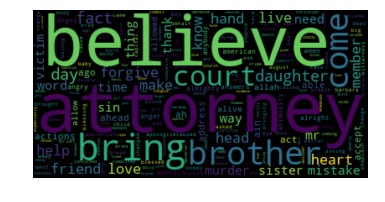

In [32]:
%matplotlib inline
from matplotlib import pyplot as plt

from wordcloud import WordCloud 

text = CorpusDF_WordCloud

# wordcloud = WordCloud().generate(text)
# wordcloud = WordCloud().generate(' '.join(text2['Crime Type'])) Exampl
wordcloud = WordCloud().generate(' '.join(text))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [33]:
ColumnNamestfidf=unigram_tfidf_vectorizer.get_feature_names()
print(ColumnNamestfidf)

X_train_vec_tfidf_WordCloud = unigram_tfidf_vectorizer.fit_transform(X_train)

CorpusDF_tfidf_WordCloud=p.DataFrame(X_train_vec_tfidf_WordCloud.toarray(),columns=ColumnNamestfidf)

print(CorpusDF_tfidf_WordCloud)


['10', '14', 'able', 'accept', 'act', 'actions', 'address', 'ago', 'ah', 'ahead', 'ain', 'alive', 'allah', 'allow', 'allowed', 'almighty', 'alright', 'amen', 'america', 'american', 'angel', 'anger', 'angry', 'animosity', 'answers', 'anybody', 'apologize', 'appreciate', 'arms', 'art', 'ask', 'asked', 'asking', 'attorney', 'attorneys', 'august', 'away', 'baby', 'bad', 'barbara', 'bear', 'beat', 'beautiful', 'behalf', 'believe', 'believes', 'belong', 'best', 'better', 'big', 'bitterness', 'blame', 'bless', 'blessed', 'blessing', 'blood', 'bobby', 'body', 'born', 'boy', 'brad', 'bread', 'breath', 'brief', 'bring', 'bringing', 'brings', 'bro', 'brother', 'brothers', 'brought', 'bye', 'called', 'came', 'capital', 'care', 'carry', 'case', 'cause', 'caused', 'chance', 'change', 'changed', 'chaplain', 'charge', 'child', 'children', 'christ', 'christian', 'church', 'closure', 'come', 'comes', 'comfort', 'coming', 'commit', 'committed', 'community', 'confess', 'continue', 'convicted', 'couldn', '

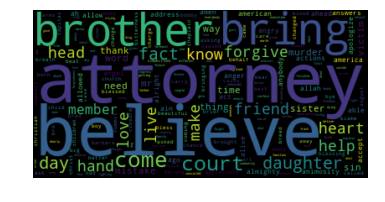

In [34]:
text2 = CorpusDF_tfidf_WordCloud

# wordcloud = WordCloud().generate(text)
# wordcloud = WordCloud().generate(' '.join(text2['Crime Type'])) Exampl
wordcloud = WordCloud().generate(' '.join(text2))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


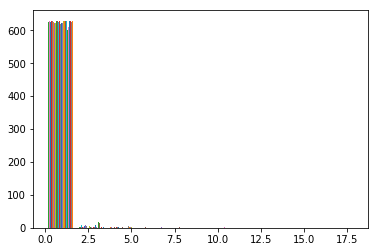

In [35]:
CorpusDF_WordCloud
CorpusDF_tfidf_WordCloud

plt.hist(CorpusDF_WordCloud)
plt.show()

In [36]:
CorpusDF_WordCloud.sum(axis=0) 

freq_dist = CorpusDF_WordCloud.sum(axis=0) 

print(CorpusDF_WordCloud.sum(axis=0))

10         4
14         3
able       8
accept     5
act        3
          ..
yall       5
yeah       5
years     42
yes       93
young      5
Length: 629, dtype: int64


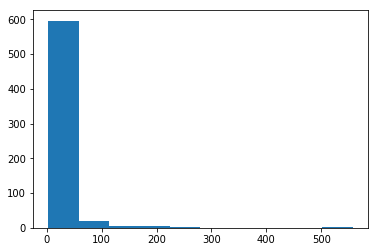

In [37]:
# CorpusDF_WordCloud
# CorpusDF_tfidf_WordCloud

plt.hist(freq_dist)
plt.show()

In [38]:
# colSums(CorpusDF_WordCloud)

from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

word_list = freq_dist

counts = Counter(word_list)

labels, values = zip(*counts.items())

# sort your values in descending order
indSort = np.argsort(values)[::-1]

print(indSort)

[ 1  0  3 18  5  2  4 15  9 11 16 28 13  6 10  8 37 42 21 44 24 25 20 17
 27 19 32 12 22 45 39 41 29 50 47  7 56 70 46 69 73 72 71 60 67 61 62 14
 63 68 64 65 66 58 23 26 55 54 53 52 51 49 48 43 40 38 74 36 35 34 33 31
 30 57 59 75]


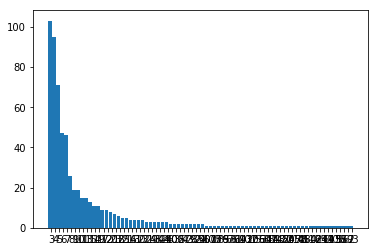

In [39]:
# rearrange your data
labels = np.array(labels)[indSort]
values = np.array(values)[indSort]

indexes = np.arange(len(labels))

bar_width = 0.35

plt.bar(indexes, values)

# add labels
plt.xticks(indexes + bar_width, labels)
plt.show()

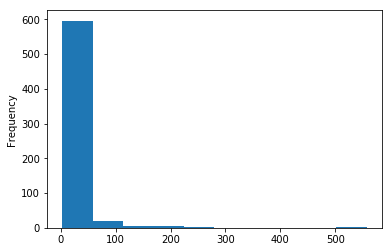

In [40]:
freq_dist.plot( x='_id', y='total', kind='hist')

In [41]:
# Adding Field Name

freq_dist.columns = ["Vocab", "Count"]

print(freq_dist)

10         4
14         3
able       8
accept     5
act        3
          ..
yall       5
yeah       5
years     42
yes       93
young      5
Length: 629, dtype: int64


In [42]:
print(freq_dist.columns)
freq_dist

['Vocab', 'Count']


10         4
14         3
able       8
accept     5
act        3
          ..
yall       5
yeah       5
years     42
yes       93
young      5
Length: 629, dtype: int64

In [43]:
# freq_dist_transpose = np.transpose(freq_dist)

# print(freq_dist_transpose)

In [44]:
type(freq_dist)

pandas.core.series.Series

In [45]:
# df = freq_dist.to_frame().T

df = freq_dist.to_frame()
print (df)

         0
10       4
14       3
able     8
accept   5
act      3
...     ..
yall     5
yeah     5
years   42
yes     93
young    5

[629 rows x 1 columns]


In [46]:
type(df)

pandas.core.frame.DataFrame

In [47]:
df = df.reset_index()

In [48]:
# Adding Field Name

df.columns = ['Vocab', 'Count']
# df.columns = ['Count']

print(df)

      Vocab  Count
0        10      4
1        14      3
2      able      8
3    accept      5
4       act      3
..      ...    ...
624    yall      5
625    yeah      5
626   years     42
627     yes     93
628   young      5

[629 rows x 2 columns]


In [49]:
df.Count.sort_values()

314      3
378      3
108      3
383      3
105      3
      ... 
539    200
496    205
289    245
162    249
326    557
Name: Count, Length: 629, dtype: int64

In [50]:
df.Count.sort_values(ascending=False)

326    557
162    249
289    245
496    205
539    200
      ... 
105      3
383      3
108      3
378      3
314      3
Name: Count, Length: 629, dtype: int64

In [51]:
# df['0'].hist(bin=50)
# df.columns

print(type(df))
print(df)


<class 'pandas.core.frame.DataFrame'>
      Vocab  Count
0        10      4
1        14      3
2      able      8
3    accept      5
4       act      3
..      ...    ...
624    yall      5
625    yeah      5
626   years     42
627     yes     93
628   young      5

[629 rows x 2 columns]


In [52]:

# df['index'].hist(bins=50)
# df['Vocab'].hist(bins=50)



In [59]:
dff = p.DataFrame({"day":[1,2,3], "Visitor":[100,200, 300]})
print(dff)

   day  Visitor
0    1      100
1    2      200
2    3      300


In [60]:
dff["day"]

0    1
1    2
2    3
Name: day, dtype: int64

In [61]:
dff[["day", "Visitor"]]

,day,Visitor
0,1,100
1,2,200
2,3,300


In [62]:
dff.rename(columns ={"day":"Days"})

,Days,Visitor
0,1,100
1,2,200
2,3,300


In [63]:
from nltk.corpus import brown


In [64]:
brown.words()

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

# Topic Modeling LDA
## LAD - Latent Drichilet Allocation

In [65]:
# ! pip install gensim --user
# ! pip3 install gensim --user

# ! pip install -U gensim
# ! pip3 install -U gensim

In [66]:
# import pip
# pip.main(['install','gensim'])

In [67]:
#  ! pip install pyldavis

In [68]:
#  https://www.youtube.com/watch?v=aPMPyUoFH8U

from gensim import matutils, models, corpora
from gensim.models.ldamulticore import LdaMulticore
import pyLDAvis.gensim #LDA Visual Librari

from nltk.corpus import stopwords
import string

from nltk.stem.wordnet import WordNetLemmatizer 
import scipy.sparse

import warnings 
warnings.simplefilter('ignore')

from itertools import chain

In [69]:
Topic_Model_LDA_df = train

In [70]:
print(Topic_Model_LDA_df)

          Label                                     Last Statement
0    Remorseful  Yes, I do, Grace Kehler is that you? I have gi...
1    Remorseful  Yes sir, I would first like to say to the Sanc...
2    Remorseful  Yes, I made peace with God. I hope y'all make ...
3         Other  I don't have anything to say, you can proceed ...
4    Remorseful  I just want to tell my family thank you, my mo...
..          ...                                                ...
420       Other  Heavenly Father, I give thanks for this time, ...
421       Other  I pray that my family will rejoice and will fo...
422  Remorseful   When asked if he had a last statement, he rep...
423  Resentment  What is about to transpire in a few moments is...
424       Other  Statement to the Media: I, at this very moment...

[425 rows x 2 columns]


# Function to Clean Data

In [71]:
# Clean data

stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

def clean(text):
    stop_free = ' '.join([word for word in text.lower().split() if word not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = ' '.join([lemma.lemmatize(word) for word in punc_free.split()])
    return normalized.split()



In [72]:
Topic_Model_LDA_df['Last Statement Clean'] = Topic_Model_LDA_df['Last Statement'].apply(clean)

In [73]:
Topic_Model_LDA_df

,Label,Last Statement,Last Statement Clean
0,Remorseful,"Yes, I do, Grace Kehler is that you? I have gi...","[yes, do, grace, kehler, you, given, warden, j..."
1,Remorseful,"Yes sir, I would first like to say to the Sanc...","[yes, sir, would, first, like, say, sanchez, f..."
2,Remorseful,"Yes, I made peace with God. I hope y'all make ...","[yes, made, peace, god, hope, yall, make, peac..."
3,Other,"I don't have anything to say, you can proceed ...","[anything, say, proceed, warden, jones]"
4,Remorseful,"I just want to tell my family thank you, my mo...","[want, tell, family, thank, you, mom, dad, sis..."
...,...,...,...
420,Other,"Heavenly Father, I give thanks for this time, ...","[heavenly, father, give, thanks, time, time, t..."
421,Other,I pray that my family will rejoice and will fo...,"[pray, family, rejoice, forgive, thank, you]"
422,Remorseful,"When asked if he had a last statement, he rep...","[asked, last, statement, replied, yes, doi, ho..."
423,Resentment,What is about to transpire in a few moments is...,"[transpire, moment, wrong, however, human, bei..."


In [74]:
# Create dictionary

dictionary = corpora.Dictionary(Topic_Model_LDA_df['Last Statement Clean'])

# Total number of non-zeroes in the BOW matrix (sum of the number of unique words per document over the entire corpus)
print(dictionary.num_nnz)

14843


In [75]:
# !python -m pip install -U gensim

In [76]:
# doc_term_matrix = [dictionary.doc2bow(doc) for doc in Topic_Model_LDA_df['Last Statement Clean']]
# print(len(doc_term_matrix))
# print(doc_term_matrix)

### LDA Model

In [77]:
# lda = gensim.models.ldamodel.LdaModel

In [78]:
# print(train)
# print(X_train)

In [79]:
# lda_df = train

X_train_vec_WordCloud = unigram_count_vectorizer.fit_transform(X_train)

CorpusDF_WordCloud=p.DataFrame(X_train_vec_WordCloud.toarray(),columns=ColumnNamesVec)

print(CorpusDF_WordCloud.shape)
print(CorpusDF_WordCloud)

(340, 629)
     10  14  able  accept  act  actions  address  ago  ah  ahead  ...  write  \
0     0   0     1       0    0        0        0    0   2      0  ...      0   
1     0   0     0       1    0        0        0    0   0      0  ...      0   
2     0   0     0       0    0        0        0    0   0      0  ...      0   
3     0   0     0       0    0        0        0    0   0      0  ...      0   
4     0   0     0       0    1        0        0    0   0      0  ...      0   
..   ..  ..   ...     ...  ...      ...      ...  ...  ..    ...  ...    ...   
335   0   0     0       0    0        0        0    0   0      0  ...      0   
336   0   0     0       0    0        0        0    0   0      0  ...      0   
337   0   0     0       0    0        0        0    0   0      0  ...      0   
338   0   0     0       0    0        0        0    0   0      0  ...      0   
339   0   0     0       0    0        0        0    0   0      0  ...      0   

     written  wrong  wrote  

In [80]:
print(type(y_train))

print(y_train)

<class 'numpy.ndarray'>
['Remorseful' 'Remorseful' 'Remorseful' 'Other' 'Other' 'Remorseful'
 'Resentment' 'Other' 'Other' 'Remorseful' 'Remorseful' 'Remorseful'
 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Other' 'Resentment'
 'Remorseful' 'Other' 'Remorseful' 'Remorseful' 'Remorseful' 'Remorseful'
 'Other' 'Remorseful' 'Other' 'Other' 'Remorseful' 'Resentment'
 'Remorseful' 'Other' 'Resentment' 'Remorseful' 'Resentment' 'Other'
 'Remorseful' 'Resentment' 'Other' 'Remorseful' 'Other' 'Other'
 'Resentment' 'Other' 'Other' 'Other' 'Remorseful' 'Remorseful'
 'Remorseful' 'Remorseful' 'Remorseful' 'Remorseful' 'Remorseful'
 'Remorseful' 'Remorseful' 'Other' 'Resentment' 'Other' 'Remorseful'
 'Other' 'Other' 'Remorseful' 'Remorseful' 'Other' 'Other' 'Other'
 'Remorseful' 'Remorseful' 'Remorseful' 'Remorseful' 'Resentment' 'Other'
 'Other' 'Remorseful' 'Other' 'Other' 'Remorseful' 'Remorseful'
 'Remorseful' 'Other' 'Remorseful' 'Remorseful' 'Other' 'Remorseful'
 'Remorseful' 'Other' 'R

# Numpy Array to Dataframe for Labels

In [81]:
# y_train_df = y_train.to_frame()

y_train_df = p.DataFrame(data=y_train.flatten())

In [82]:
y_train_df

,0
0,Remorseful
1,Remorseful
2,Remorseful
3,Other
4,Other
...,...
335,Remorseful
336,Other
337,Resentment
338,Remorseful


# Adding Labels to the Document Term Matrix

In [83]:
# CorpusDF_WordCloud.insert(0, "Label", y_train_df)

In [84]:
lda_dtm = CorpusDF_WordCloud
print(lda_dtm)

     10  14  able  accept  act  actions  address  ago  ah  ahead  ...  write  \
0     0   0     1       0    0        0        0    0   2      0  ...      0   
1     0   0     0       1    0        0        0    0   0      0  ...      0   
2     0   0     0       0    0        0        0    0   0      0  ...      0   
3     0   0     0       0    0        0        0    0   0      0  ...      0   
4     0   0     0       0    1        0        0    0   0      0  ...      0   
..   ..  ..   ...     ...  ...      ...      ...  ...  ..    ...  ...    ...   
335   0   0     0       0    0        0        0    0   0      0  ...      0   
336   0   0     0       0    0        0        0    0   0      0  ...      0   
337   0   0     0       0    0        0        0    0   0      0  ...      0   
338   0   0     0       0    0        0        0    0   0      0  ...      0   
339   0   0     0       0    0        0        0    0   0      0  ...      0   

     written  wrong  wrote  ya  yall  y

In [85]:
lda_dtm.set_index('Label')

KeyError: "None of ['Label'] are in the columns"

In [ ]:
lda_dtm_transpose = lda_dtm.transpose()

In [86]:
lda_dtm_transpose

NameError: name 'lda_dtm_transpose' is not defined

In [87]:
lda_dtm_to_tdm = lda_dtm_transpose.rename(columns=lda_dtm_transpose.iloc[0])

NameError: name 'lda_dtm_transpose' is not defined

In [88]:
lda_dtm_to_tdm

NameError: name 'lda_dtm_to_tdm' is not defined

# Creating Labels as Headers

In [89]:
lda_dtm_to_tdm = lda_dtm_to_tdm.iloc[1:, :]

NameError: name 'lda_dtm_to_tdm' is not defined

In [90]:
lda_dtm_to_tdm

NameError: name 'lda_dtm_to_tdm' is not defined

In [91]:
# Convert to gensim format
sparse_counts = scipy.sparse.csr_matrix(lda_dtm_to_tdm)

corpus2 = matutils.Sparse2Corpus(sparse_counts)

NameError: name 'lda_dtm_to_tdm' is not defined

In [92]:
# Use this for the error above
sparse_counts = scipy.sparse.csr_matrix(lda_dtm_to_tdm.astype(np.float))

corpus2 = matutils.Sparse2Corpus(sparse_counts)

NameError: name 'lda_dtm_to_tdm' is not defined

In [93]:
# gensim requires a dictionary of vocabulary items

id2word = dict((v, k) for k, v in unigram_count_vectorizer.vocabulary_.items())


In [94]:
lda_model = models.LdaModel(corpus=corpus2, id2word=id2word, num_topics=3, passes=40)
# lda_model = models.LdaModel(corpus=corpus2, num_topics=3, passes=10)

lda_model.print_topics()

NameError: name 'corpus2' is not defined

# Associative Rule Mining

In [95]:
# conda install -c conda-forge mlxtend

In [96]:
# conda install mlxtend

# !pip install mlxtend --user

In [97]:
# conda install mlxtend

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules


X_train_vec_WordCloud = unigram_count_vectorizer.fit_transform(X_train)

apriori_df =p.DataFrame(X_train_vec_WordCloud.toarray(),columns=ColumnNamesVec)

apriori_df.head()



,10,14,able,accept,act,actions,address,ago,ah,ahead,...,write,written,wrong,wrote,ya,yall,yeah,years,yes,young
0,0,0,1,0,0,0,0,0,2,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0


# Associative Rule Mining Needs to be 1 or 0 and not a count

In [98]:
def encode_unit(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
    
apriori_df = apriori_df.applymap(encode_unit)

print(apriori_df)

     10  14  able  accept  act  actions  address  ago  ah  ahead  ...  write  \
0     0   0     1       0    0        0        0    0   1      0  ...      0   
1     0   0     0       1    0        0        0    0   0      0  ...      0   
2     0   0     0       0    0        0        0    0   0      0  ...      0   
3     0   0     0       0    0        0        0    0   0      0  ...      0   
4     0   0     0       0    1        0        0    0   0      0  ...      0   
..   ..  ..   ...     ...  ...      ...      ...  ...  ..    ...  ...    ...   
335   0   0     0       0    0        0        0    0   0      0  ...      0   
336   0   0     0       0    0        0        0    0   0      0  ...      0   
337   0   0     0       0    0        0        0    0   0      0  ...      0   
338   0   0     0       0    0        0        0    0   0      0  ...      0   
339   0   0     0       0    0        0        0    0   0      0  ...      0   

     written  wrong  wrote  ya  yall  y

In [99]:
freq_itemsets = apriori(apriori_df, min_support = 0.07, use_colnames = True)


rules = association_rules(freq_itemsets, metric = "lift", min_threshold = 1)

rules.head()


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(family),(ask),0.452941,0.114706,0.073529,0.162338,1.415251,0.021574,1.056863
1,(ask),(family),0.114706,0.452941,0.073529,0.641026,1.415251,0.021574,1.523950
2,(love),(ask),0.629412,0.114706,0.088235,0.140187,1.222142,0.016038,1.029636
3,(ask),(love),0.114706,0.629412,0.088235,0.769231,1.222142,0.016038,1.605882
4,(love),(care),0.629412,0.100000,0.088235,0.140187,1.401869,0.025294,1.046739


In [100]:
rules.sort_values(by='lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
388,"(sorry, pain)",(caused),0.102941,0.102941,0.070588,0.685714,6.661224,0.059991,2.854278
389,(caused),"(sorry, pain)",0.102941,0.102941,0.070588,0.685714,6.661224,0.059991,2.854278
383,(caused),"(family, pain)",0.102941,0.111765,0.073529,0.714286,6.390977,0.062024,3.108824
382,"(family, pain)",(caused),0.111765,0.102941,0.073529,0.657895,6.390977,0.062024,2.622172
361,(stay),(strong),0.094118,0.120588,0.070588,0.750000,6.219512,0.059239,3.517647
...,...,...,...,...,...,...,...,...,...
93,(ready),(family),0.173529,0.452941,0.079412,0.457627,1.010346,0.000813,1.008640
242,(tell),(know),0.211765,0.358824,0.076471,0.361111,1.006375,0.000484,1.003581
243,(know),(tell),0.358824,0.211765,0.076471,0.213115,1.006375,0.000484,1.001716
316,(love),(say),0.629412,0.270588,0.170588,0.271028,1.001625,0.000277,1.000603


In [101]:
freq_itemsets['length'] = freq_itemsets['itemsets'].apply(lambda x: len(x))
freq_itemsets.sort_values(by='length', ascending=False)

,support,itemsets,length
390,0.070588,"(know, love, ll, ya)",4
385,0.094118,"(know, family, want, love)",4
380,0.070588,"(god, know, family, love)",4
381,0.073529,"(love, family, hope, sorry)",4
382,0.073529,"(just, family, want, love)",4
...,...,...,...
38,0.097059,(make),1
37,0.079412,(loved),1
36,0.629412,(love),1
35,0.070588,(lot),1


## Apriori - Method #2

In [102]:
# https://intellipaat.com/blog/data-science-apriori-algorithm/

# !pip install apyori   

In [103]:
from apyori import apriori

store_data = p.read_csv("C:/Users/veo78/Data Science/Apriori_ASM_Dataset.csv", header = None)

In [104]:
store_data

,0,1,2,3,4,5
0,Wine,Chips,Bread,Butter,Milk,Apple
1,Wine,Chips,Bread,Butter,Milk,Apple
2,Wine,Chips,Bread,Butter,Milk,Apple
3,Wine,Chips,Bread,Butter,Milk,Apple
4,Wine,Chips,Bread,Butter,Milk,Apple
5,Wine,Chips,Bread,Butter,Milk,Apple
6,Wine,Chips,Bread,Butter,Milk,Apple
7,Wine,Chips,Bread,Butter,Milk,Apple
8,Wine,Chips,Bread,Butter,Milk,Apple
9,Wine,Chips,Bread,Butter,Milk,Apple


In [105]:
store_data.shape

(22, 6)

In [106]:
# Converting the panda f=dataframe into a list f lists

records =[]
for i in range(0,22):
    records.append([str(store_data.values[i,j]) for j in range(0,6)])

In [107]:
records

[['Wine', 'Chips', 'Bread', 'Butter', 'Milk', 'Apple'],
 ['Wine', 'Chips', 'Bread', 'Butter', 'Milk', 'Apple'],
 ['Wine', 'Chips', 'Bread', 'Butter', 'Milk', 'Apple'],
 ['Wine', 'Chips', 'Bread', 'Butter', 'Milk', 'Apple'],
 ['Wine', 'Chips', 'Bread', 'Butter', 'Milk', 'Apple'],
 ['Wine', 'Chips', 'Bread', 'Butter', 'Milk', 'Apple'],
 ['Wine', 'Chips', 'Bread', 'Butter', 'Milk', 'Apple'],
 ['Wine', 'Chips', 'Bread', 'Butter', 'Milk', 'Apple'],
 ['Wine', 'Chips', 'Bread', 'Butter', 'Milk', 'Apple'],
 ['Wine', 'Chips', 'Bread', 'Butter', 'Milk', 'Apple'],
 ['Wine', 'Chips', 'Bread', 'Butter', 'Milk', 'Apple'],
 ['Wine', 'Chips', 'Bread', 'Butter', 'Milk', 'Apple'],
 ['Wine', 'Chips', 'Bread', 'Butter', 'Milk', 'Apple'],
 ['Wine', 'Chips', 'Bread', 'Butter', 'Milk', 'Apple'],
 ['Wine', 'Chips', 'Bread', 'Butter', 'Milk', 'Apple'],
 ['Wine', 'Chips', 'Bread', 'Butter', 'Milk', 'Apple'],
 ['Wine', 'Chips', 'Bread', 'Butter', 'Milk', 'Apple'],
 ['Wine', 'Chips', 'Bread', 'Butter', 'Milk', 'A

In [108]:
association_rules = apriori(records, min_support=0.50, min_confidence=0.7, min_lift=1.2, min_length=2)
association_results = list(association_rules)

In [109]:
print(len(association_results))

0


In [110]:
print(association_results)

[]


# K-Means Clustering

In [111]:
# X_train_tfidf_vec_Kmeans = unigram_tfidf_vectorizer.fit_transform(X_train)

# X_train_tfidf_vec_Kmeans

In [112]:
ColumnNamesVec_Kmean=unigram_tfidf_vectorizer.get_feature_names()
print(ColumnNamesVec_Kmean)

['10', '14', 'able', 'accept', 'act', 'actions', 'address', 'ago', 'ah', 'ahead', 'ain', 'alive', 'allah', 'allow', 'allowed', 'almighty', 'alright', 'amen', 'america', 'american', 'angel', 'anger', 'angry', 'animosity', 'answers', 'anybody', 'apologize', 'appreciate', 'arms', 'art', 'ask', 'asked', 'asking', 'attorney', 'attorneys', 'august', 'away', 'baby', 'bad', 'barbara', 'bear', 'beat', 'beautiful', 'behalf', 'believe', 'believes', 'belong', 'best', 'better', 'big', 'bitterness', 'blame', 'bless', 'blessed', 'blessing', 'blood', 'bobby', 'body', 'born', 'boy', 'brad', 'bread', 'breath', 'brief', 'bring', 'bringing', 'brings', 'bro', 'brother', 'brothers', 'brought', 'bye', 'called', 'came', 'capital', 'care', 'carry', 'case', 'cause', 'caused', 'chance', 'change', 'changed', 'chaplain', 'charge', 'child', 'children', 'christ', 'christian', 'church', 'closure', 'come', 'comes', 'comfort', 'coming', 'commit', 'committed', 'community', 'confess', 'continue', 'convicted', 'couldn', '

In [113]:
X_train_tfidf_vec_Kmeans = unigram_tfidf_vectorizer.fit_transform(X_train)

Kmeans_Clustering_tfidf_vec=p.DataFrame(X_train_tfidf_vec_Kmeans.toarray(),columns=ColumnNamesVec_Kmean)

print(Kmeans_Clustering_tfidf_vec)

      10   14     able    accept       act  actions  address  ago        ah  \
0    0.0  0.0  0.21982  0.000000  0.000000      0.0      0.0  0.0  0.407546   
1    0.0  0.0  0.00000  0.117709  0.000000      0.0      0.0  0.0  0.000000   
2    0.0  0.0  0.00000  0.000000  0.000000      0.0      0.0  0.0  0.000000   
3    0.0  0.0  0.00000  0.000000  0.000000      0.0      0.0  0.0  0.000000   
4    0.0  0.0  0.00000  0.000000  0.082679      0.0      0.0  0.0  0.000000   
..   ...  ...      ...       ...       ...      ...      ...  ...       ...   
335  0.0  0.0  0.00000  0.000000  0.000000      0.0      0.0  0.0  0.000000   
336  0.0  0.0  0.00000  0.000000  0.000000      0.0      0.0  0.0  0.000000   
337  0.0  0.0  0.00000  0.000000  0.000000      0.0      0.0  0.0  0.000000   
338  0.0  0.0  0.00000  0.000000  0.000000      0.0      0.0  0.0  0.000000   
339  0.0  0.0  0.00000  0.000000  0.000000      0.0      0.0  0.0  0.000000   

     ahead  ...  write   written     wrong  wrote  

In [114]:
from sklearn.cluster import KMeans

k = 2

km = KMeans(n_clusters=k, algorithm='auto', init='random', n_init=20, random_state=0, verbose=False)
km.fit(Kmeans_Clustering_tfidf_vec)


# cm = pd.crosstab(HMD_subset_labels, km.labels_)
cm = p.crosstab(y, km.labels_)
print(cm)
print()


ValueError: arrays must all be same length

## Error due to using Training dataset and the size of the vectors do not match

In [115]:
print(y.shape)
print(Kmeans_Clustering_tfidf_vec.shape)

(425,)
(340, 629)


## Use X instead of X_train
### X_train is a subset of X

In [116]:
X_train_tfidf_vec_Kmeans = unigram_tfidf_vectorizer.fit_transform(X)

ColumnNamesVec_Kmean=unigram_tfidf_vectorizer.get_feature_names()
print(ColumnNamesVec_Kmean)

['10', '12', '13', '14', 'able', 'accept', 'accident', 'act', 'actions', 'address', 'ago', 'ah', 'ahead', 'ain', 'al', 'alive', 'allah', 'allow', 'allowed', 'almighty', 'alright', 'amen', 'america', 'american', 'amy', 'angel', 'anger', 'angry', 'animosity', 'anointest', 'answers', 'anybody', 'apologize', 'apology', 'appreciate', 'arms', 'art', 'ask', 'asked', 'asking', 'attorney', 'attorneys', 'august', 'aunt', 'away', 'baby', 'bad', 'barbara', 'bear', 'beat', 'beautiful', 'began', 'begin', 'beginning', 'behalf', 'believe', 'believes', 'belong', 'best', 'better', 'big', 'bitter', 'bitterness', 'black', 'blame', 'bless', 'blessed', 'blessing', 'blessings', 'blood', 'bobby', 'body', 'born', 'boy', 'brad', 'bread', 'breath', 'brief', 'bring', 'bringing', 'brings', 'bro', 'brother', 'brothers', 'brought', 'bye', 'called', 'came', 'capital', 'care', 'careful', 'carry', 'case', 'cases', 'cause', 'caused', 'chance', 'change', 'changed', 'chaplain', 'charge', 'cherish', 'child', 'children', 'c

In [117]:
Kmeans_Clustering_tfidf_vec=p.DataFrame(X_train_tfidf_vec_Kmeans.toarray(),columns=ColumnNamesVec_Kmean)

print(Kmeans_Clustering_tfidf_vec)

      10   12   13   14  able  accept  accident  act  actions  address  ...  \
0    0.0  0.0  0.0  0.0   0.0     0.0       0.0  0.0      0.0      0.0  ...   
1    0.0  0.0  0.0  0.0   0.0     0.0       0.0  0.0      0.0      0.0  ...   
2    0.0  0.0  0.0  0.0   0.0     0.0       0.0  0.0      0.0      0.0  ...   
3    0.0  0.0  0.0  0.0   0.0     0.0       0.0  0.0      0.0      0.0  ...   
4    0.0  0.0  0.0  0.0   0.0     0.0       0.0  0.0      0.0      0.0  ...   
..   ...  ...  ...  ...   ...     ...       ...  ...      ...      ...  ...   
420  0.0  0.0  0.0  0.0   0.0     0.0       0.0  0.0      0.0      0.0  ...   
421  0.0  0.0  0.0  0.0   0.0     0.0       0.0  0.0      0.0      0.0  ...   
422  0.0  0.0  0.0  0.0   0.0     0.0       0.0  0.0      0.0      0.0  ...   
423  0.0  0.0  0.0  0.0   0.0     0.0       0.0  0.0      0.0      0.0  ...   
424  0.0  0.0  0.0  0.0   0.0     0.0       0.0  0.0      0.0      0.0  ...   

        wrong    wrongs  wrote   ya  yall  yea  yea

In [118]:

k = 2

km = KMeans(n_clusters=k, algorithm='auto', init='random', n_init=20, random_state=0, verbose=False)
km.fit(Kmeans_Clustering_tfidf_vec)


# cm = pd.crosstab(HMD_subset_labels, km.labels_)
cm = p.crosstab(y, km.labels_)
print(cm)
print()

col_0         0   1
row_0              
Other        96  90
Remorseful  132  58
Resentment   38  11



In [119]:
# clustering using all labels and all features
# transform feature values with zscore transformation

from scipy.stats import zscore

Kmeans_Clustering_tfidf_vec = Kmeans_Clustering_tfidf_vec.apply(zscore)
k=3

km3 = KMeans(n_clusters=k, algorithm='auto', init='random', n_init=20, random_state=0, verbose=False)
km3.fit(Kmeans_Clustering_tfidf_vec)

cm3 = p.crosstab(y, km3.labels_)
print(cm3)

col_0       0  1    2
row_0                
Other       4  1  181
Remorseful  3  0  187
Resentment  1  0   48


## Let's Graph the Centroids

[[3.05337488e+01 4.37434273e+01 8.25906185e-07]
 [3.19596836e+01 6.74349576e-07 4.37434273e+01]
 [1.97123834e-08 3.19596836e+01 3.05337488e+01]]


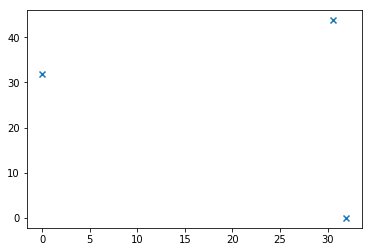

In [120]:
   
centroids = km3.cluster_centers_

transformed_centroids = km3.fit_transform(centroids)
print(transformed_centroids)


plt.scatter(transformed_centroids[:, 0], transformed_centroids[:, 1], marker='x')
plt.show()

# plt.savefig('Centroids.png', dpi=200) #save figure as ward_clusters

## PCA for Scatter Plot

In [121]:

%matplotlib inline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from sklearn.cluster import MiniBatchKMeans

In [122]:
# features = unigram_count_vectorizer.fit_transform(X)

features = unigram_tfidf_vectorizer.fit_transform(X)

print(features)
# print(X.text.values)

  (0, 386)	0.12345165538372709
  (0, 391)	0.034323491578194275
  (0, 709)	0.07954013221930545
  (0, 103)	0.10435115720923616
  (0, 337)	0.09841170478686956
  (0, 663)	0.09592166163962057
  (0, 700)	0.09592166163962057
  (0, 166)	0.1212780723220203
  (0, 217)	0.12401103590652236
  (0, 599)	0.1079942852022143
  (0, 403)	0.13395839503787416
  (0, 147)	0.06918261184557005
  (0, 363)	0.10610259176767349
  (0, 321)	0.19996344232523505
  (0, 276)	0.08882912437152483
  (0, 743)	0.1011953361972439
  (0, 483)	0.16150474984269422
  (0, 198)	0.04174092394859431
  (0, 177)	0.12437581462252942
  (0, 669)	0.15247412238084618
  (0, 381)	0.1942678086833245
  (0, 731)	0.12437581462252942
  (0, 633)	0.19184332327924114
  (0, 459)	0.06665448077507836
  (0, 605)	0.4149346265701847
  :	:
  (423, 244)	0.2284029328107434
  (423, 219)	0.22855079760903596
  (423, 391)	0.09862519910445065
  (423, 217)	0.1781667969234234
  (423, 147)	0.09939473745395443
  (423, 483)	0.23203405855815604
  (423, 669)	0.109529872884

In [123]:
# seed the pseudorandom number generator
# from random import seed
# from random import random

import random

r = random.random()

# for reproducibility
random_state = int(r)

In [124]:
cls = MiniBatchKMeans(n_clusters=3, random_state=random_state)
cls.fit(features)

MiniBatchKMeans(n_clusters=3, random_state=0)

In [125]:
# predict cluster labels for new dataset
cls.predict(features)

# to get cluster labels for the dataset used while
# training the model (used for models that does not
# support prediction on new dataset).
cls.labels_

array([1, 1, 1, 2, 0, 2, 1, 0, 2, 0, 2, 1, 1, 0, 2, 2, 1, 1, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 2, 1, 2, 0, 1, 0, 2, 0, 2, 2, 1, 0, 0, 2, 0, 1, 0,
       0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 2, 2, 0, 0, 2, 1, 0,
       0, 1, 0, 1, 2, 2, 1, 0, 0, 1, 1, 2, 2, 1, 1, 2, 2, 2, 0, 0, 2, 0,
       0, 1, 1, 2, 0, 2, 0, 1, 2, 2, 2, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2,
       0, 0, 2, 1, 1, 0, 2, 1, 2, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2,
       1, 2, 0, 0, 2, 0, 0, 0, 1, 0, 2, 0, 2, 0, 0, 0, 2, 1, 1, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 1, 2, 0,
       2, 0, 2, 2, 1, 1, 0, 0, 1, 0, 0, 1, 2, 2, 1, 1, 1, 2, 2, 0, 2, 2,
       1, 1, 1, 2, 0, 1, 2, 0, 2, 0, 2, 1, 2, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 0, 0, 1, 2, 1,
       1, 2, 2, 2, 2, 1, 2, 0, 0, 1, 1, 2, 2, 1, 0, 2, 2, 1, 1, 0, 2, 1,
       1, 1, 0, 1, 1, 2, 0, 0, 1, 1, 1, 2, 2, 2, 0, 2, 2, 0, 2, 1, 2, 2,
       2, 2, 1, 2, 1, 2, 1, 2, 2, 0, 0, 0, 0, 2, 2,

In [129]:
# reduce the features to 2D
pca = PCA(n_components=2, random_state=random_state)
reduced_features = pca.fit_transform(features.toarray())

In [130]:
# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(cls.cluster_centers_)

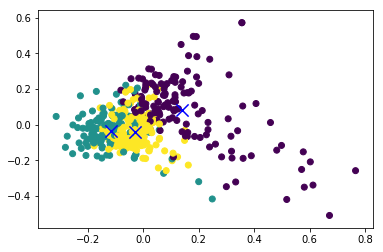

In [131]:
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.predict(features))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')

# plt.savefig('Cluster_3.png', dpi=200) #save figure as ward_clusters

## Evaluation
Evaluation for unsupervised learning algorithms is a bit difficult and requires human judgement but there are some metrics which you might use. There are two kinds of metrics you can use depending on whether or not you have the labels. For most of the clustering problems, you probably won’t have labels. If you had you’d do classification instead. But it is what it is. Here are a couple of them which I want to show you but you can read about other metrics on your own.

Evalauation with labelled dataset

If you have labelled dataset then you can use few metrics that give you an idea of how good your clustering model is. The one I’m going to show you here is homogeneity_score but you can find and read about many other metrics in sklearn.metrics module. As per the documentation, the score ranges between 0 and 1 where 1 stands for perfectly homogeneous labeling.

In [132]:
from sklearn.metrics import homogeneity_score

# homogeneity_score(df.label, cls.predict(features))
homogeneity_score(y, cls.predict(features))

0.19695785141927807

## Evaluation with unlabeled dataset

If you don’t have labels for your dataset, then you can still evaluate your clustering model with some metrics. One of them is Silhouette Coefficient. From the sklearn’s documentation:

The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a,b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of.

The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

In [133]:
from sklearn.metrics import silhouette_score
silhouette_score(features, labels=cls.predict(features))

0.012398785096084285

0.012398785096084285

So this value means that our clusters are overlapping. We can also see this in the plot above. Perhaps tuning different parameters for feature extractor and the clustering model will increase this score.

# Hierarchical Document Clustering

In [134]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(Kmeans_Clustering_tfidf_vec)
print

<function print>

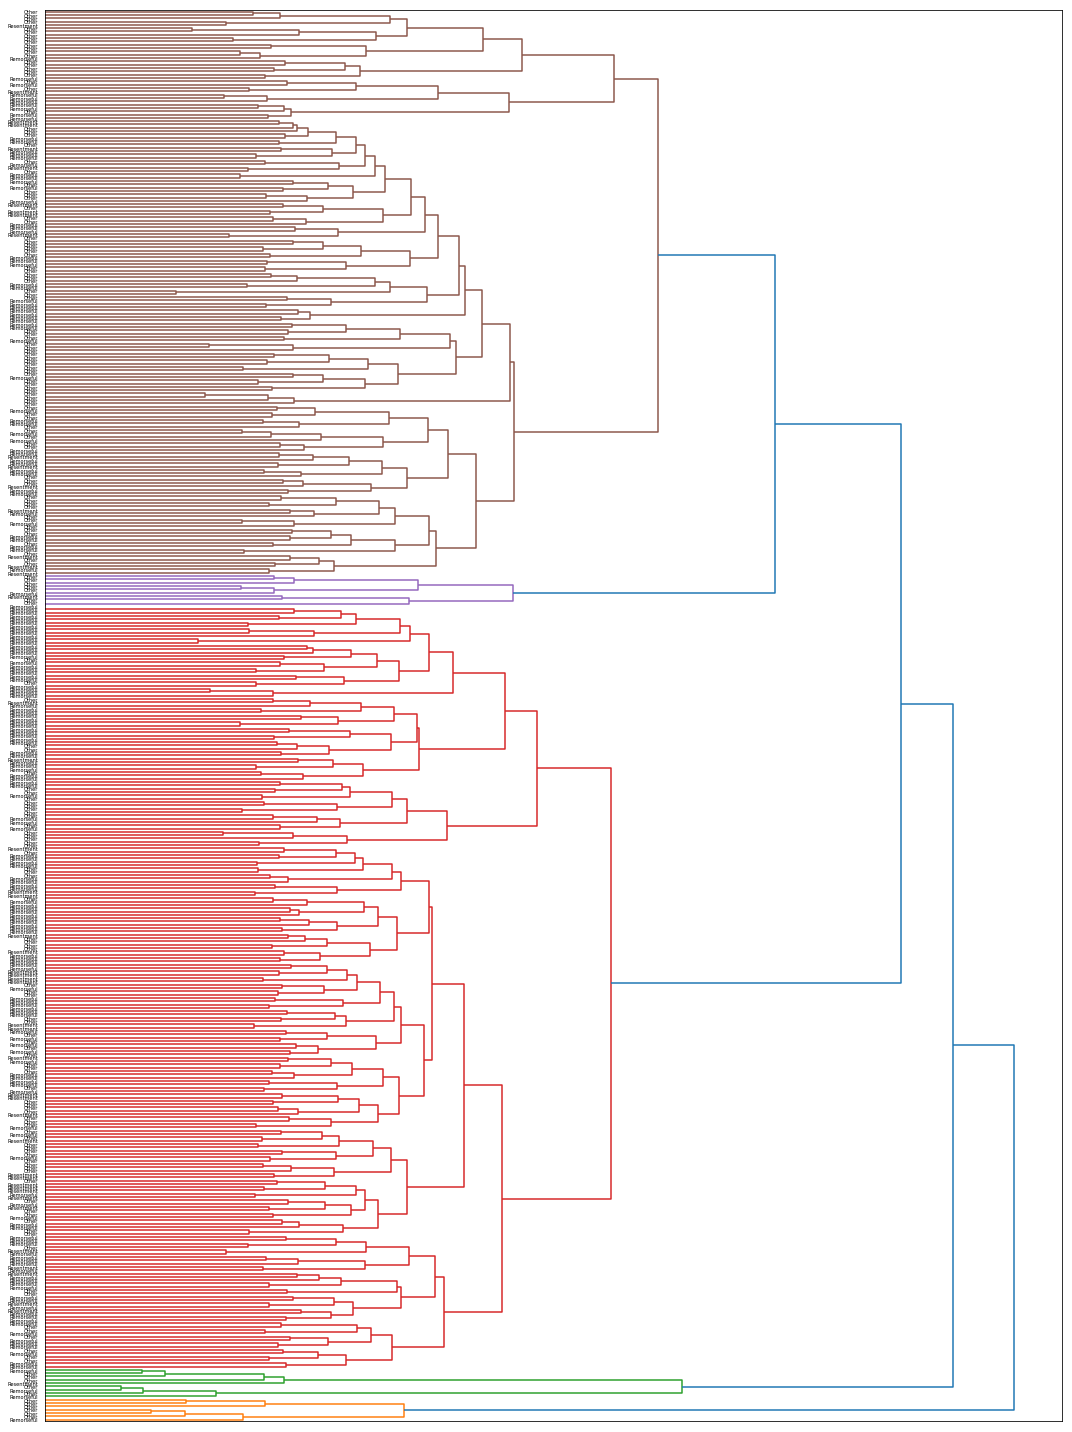

In [135]:

from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=y);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout



In [136]:
# plt.close()

## Rerun the Hierarchical Document Clustering with better label

In [137]:
train=p.read_csv("C:/Users/veo78/IST 736 Text Mining/offenders_Label_ROR _Hierarchy_Clustering.csv", encoding= 'unicode_escape')
y2=train['Label'].values
# X=train['Last Statement'].values

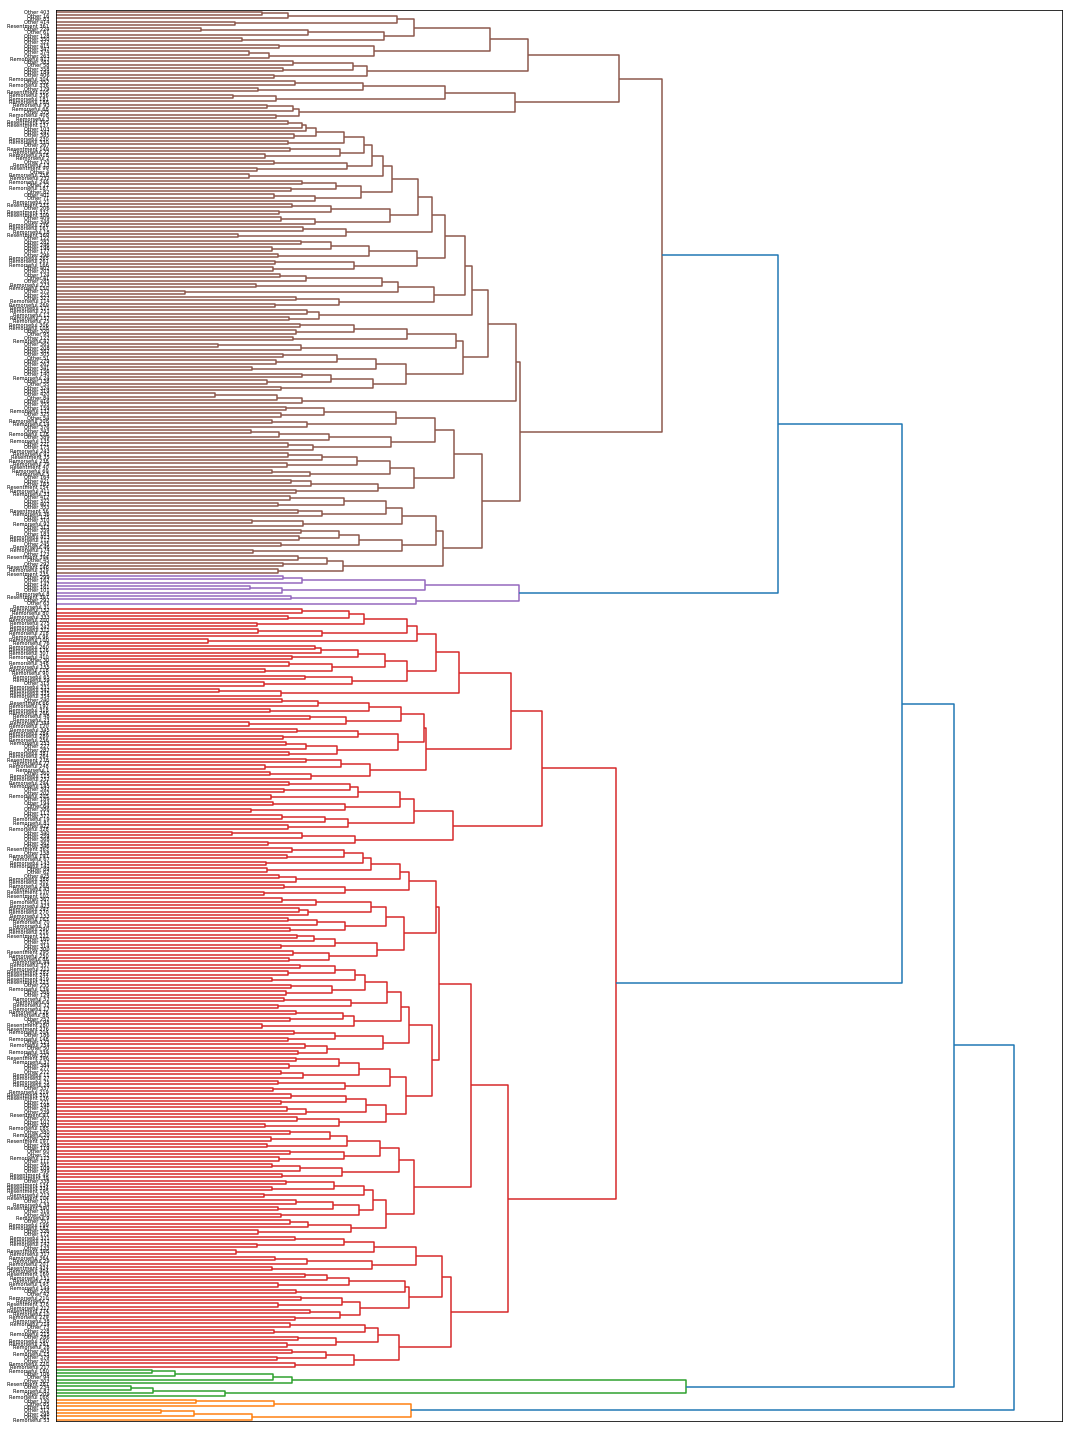

In [138]:

from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=y2);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout



In [139]:
# plt.close()

## WSS - Elbow Method

In [141]:
Kmeans_Clustering_tfidf_vec.head()

,10,12,13,14,able,accept,accident,act,actions,address,...,wrong,wrongs,wrote,ya,yall,yea,yeah,years,yes,young
0,-0.103943,-0.076695,-0.063592,-0.078893,-0.126284,-0.110577,-0.078712,-0.0901,-0.101076,-0.139323,...,-0.23124,-0.069774,-0.114508,-0.318235,-0.093375,-0.096736,-0.109065,-0.329104,0.274963,-0.09678
1,-0.103943,-0.076695,-0.063592,-0.078893,-0.126284,-0.110577,-0.078712,-0.0901,-0.101076,-0.139323,...,-0.23124,-0.069774,-0.114508,-0.318235,-0.093375,-0.096736,-0.109065,-0.329104,1.462275,-0.09678
2,-0.103943,-0.076695,-0.063592,-0.078893,-0.126284,-0.110577,-0.078712,-0.0901,-0.101076,-0.139323,...,-0.23124,-0.069774,-0.114508,-0.318235,-0.093375,-0.096736,-0.109065,-0.329104,3.419241,-0.09678
3,-0.103943,-0.076695,-0.063592,-0.078893,-0.126284,-0.110577,-0.078712,-0.0901,-0.101076,-0.139323,...,-0.23124,-0.069774,-0.114508,-0.318235,-0.093375,-0.096736,-0.109065,-0.329104,-0.434892,-0.09678
4,-0.103943,-0.076695,-0.063592,-0.078893,-0.126284,-0.110577,-0.078712,-0.0901,-0.101076,-0.139323,...,-0.23124,-0.069774,-0.114508,-0.318235,-0.093375,-0.096736,-0.109065,-0.329104,-0.434892,-0.09678


In [142]:
# Initialize an arbitrary center point

# means = [[4, 3], [5,5]]

# clusterer = KMeansClusterer(2, euclidean_distance, initial_means=means)
# clusters = clusterer.cluster(Kmeans_Clustering_tfidf_vec, True, trace=True)

# print('Clustered:', Kmeans_Clustering_tfidf_vec)
# print('As:', clusters)
# print('Means:', clusterer.means())

In [143]:
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.preprocessing import StandardScaler

ValueError: x and y must have same first dimension, but have shapes (9,) and (1,)

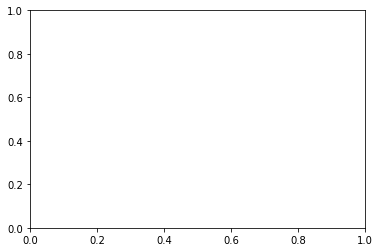

In [145]:
K = range(1,10)

wss = []

for k in K:
    km = KMeans(n_clusters=k)
    # km = km.fit(normalized_data) # Our data has been normalized
    km = km.fit(Kmeans_Clustering_tfidf_vec) # Our data has been normalized
    wss.append(km.inertia_)
    
    plt.plot(K, wss, 'bx-')
    plt.xlabel('No of Clusters')
    plt.ylabel('WSS - Sum of squared distance')
    plt.title('Elbow Method for Optimal k')
    plt.show()
    
#     plt.savefig('Elbow_Method.png', dpi=200) #save figure 

In [146]:
# !pip yellowbrick

In [147]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer


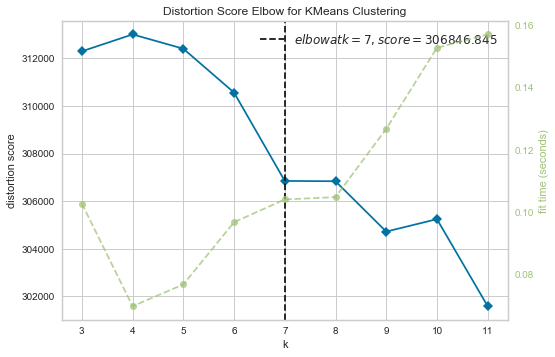

<Figure size 576x396 with 0 Axes>

In [148]:

# # Generate synthetic dataset with 8 random clusters
# X, y = make_blobs(n_samples=1000, n_features=12, centers=8, random_state=42)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,12))

visualizer.fit(Kmeans_Clustering_tfidf_vec)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

visualizer.show(outpath="kelbow_minibatchkmeans.png")
